In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
filepath_input_data = "C:\\Users\\Lenovo\\airfoil_self_noise.dat"
df = pd.read_csv(filepath_input_data,delim_whitespace=True,
                           names=['Frequency',
                                 'Angle_of_Attack',
                                 'Chord_length',
                                 'Free_stream_velocity',
                                 'Suction_side_displacement_thickness',
                                 'Noise'])

In [3]:
df.head()

,Frequency,Angle_of_Attack,Chord_length,Free_stream_velocity,Suction_side_displacement_thickness,Noise
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [4]:
df.Free_stream_velocity.unique()

array([71.3, 55.5, 39.6, 31.7])

In [5]:
df.describe()

,Frequency,Angle_of_Attack,Chord_length,Free_stream_velocity,Suction_side_displacement_thickness,Noise
count,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000
mean,2886.380572,6.782302,0.136548,50.860745,0.011140,124.835943
std,3152.573137,5.918128,0.093541,15.572784,0.013150,6.898657
min,200.000000,0.000000,0.025400,31.700000,0.000401,103.380000
25%,800.000000,2.000000,0.050800,39.600000,0.002535,120.191000
50%,1600.000000,5.400000,0.101600,39.600000,0.004957,125.721000
75%,4000.000000,9.900000,0.228600,71.300000,0.015576,129.995500
max,20000.000000,22.200000,0.304800,71.300000,0.058411,140.987000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 6 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Frequency                            1503 non-null   int64  
 1   Angle_of_Attack                      1503 non-null   float64
 2   Chord_length                         1503 non-null   float64
 3   Free_stream_velocity                 1503 non-null   float64
 4   Suction_side_displacement_thickness  1503 non-null   float64
 5   Noise                                1503 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 70.6 KB


In [7]:
df.shape

(1503, 6)

In [8]:
#check for duplicates
df.loc[df.duplicated()]

,Frequency,Angle_of_Attack,Chord_length,Free_stream_velocity,Suction_side_displacement_thickness,Noise


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


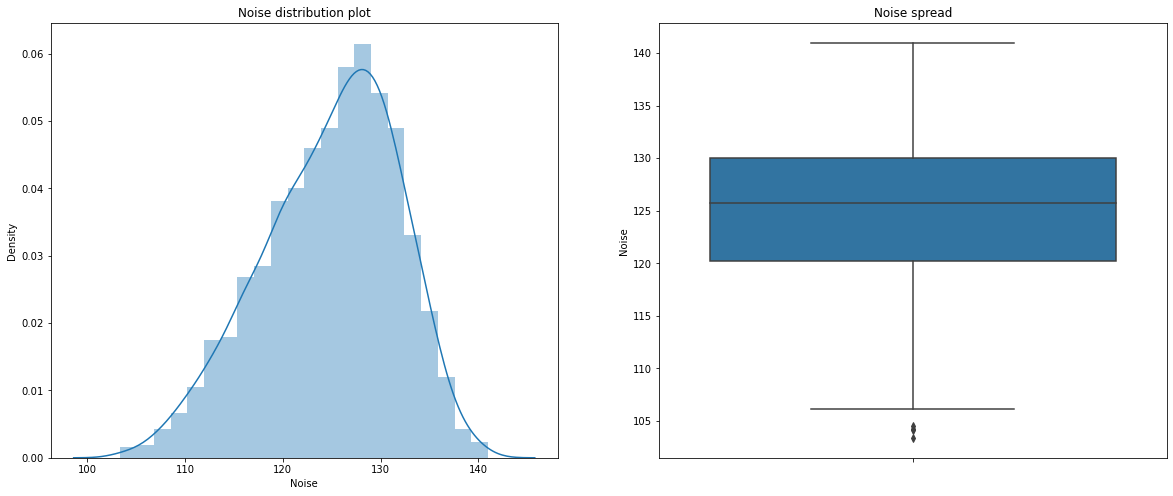

In [9]:
#Visualize data
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Noise distribution plot')
sns.distplot(df.Noise)

plt.subplot(1,2,2)
plt.title('Noise spread')
sns.boxplot(y=df.Noise)

plt.show()

In [10]:
print(df.Noise.describe(percentiles=[0.25,0.5,0.85,0.90,1]))

count    1503.000000
mean      124.835943
std         6.898657
min       103.380000
25%       120.191000
50%       125.721000
85%       131.881800
90%       133.234000
100%      140.987000
max       140.987000
Name: Noise, dtype: float64


[Text(0.5, 0, 'Free stream velocity'),
 Text(0, 0.5, 'Frequency of Free stream velocity')]

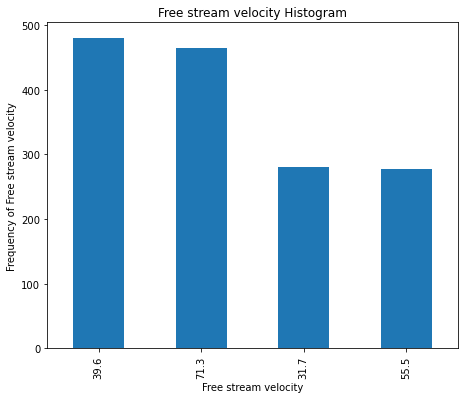

In [11]:
#Visualize Categorical value
fig = plt.figure(figsize=(25,6))

plt.subplot(1,3,1)
plt1 = df.Free_stream_velocity.value_counts().plot(kind = 'bar')
plt.title('Free stream velocity Histogram')
plt1.set(xlabel = 'Free stream velocity',ylabel = 'Frequency of Free stream velocity')

Text(0.5, 1.0, ' Frequency vs Noise ')

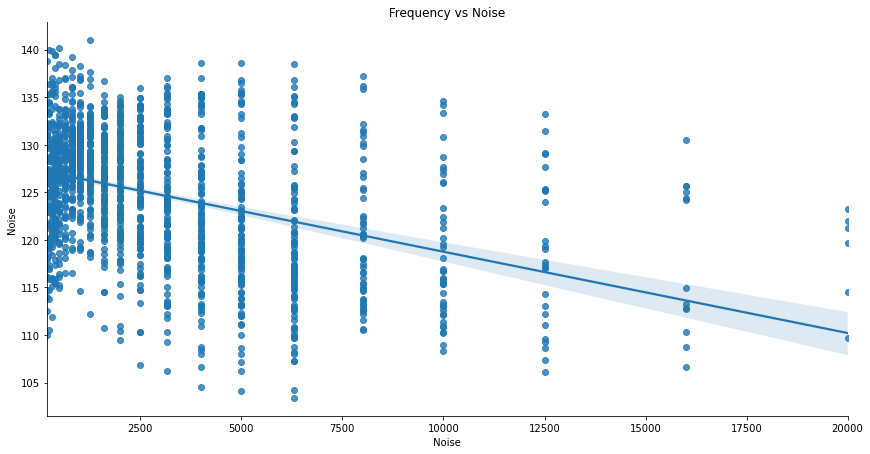

In [12]:
#Line plot
sns.lmplot(x="Frequency", y="Noise", data=df,aspect=2,height=6)
plt.xlabel(' Frequency ')
plt.xlabel(' Noise ')
plt.title(' Frequency vs Noise ')

Text(0.5, 1.0, ' Angle_of_Attack vs Noise ')

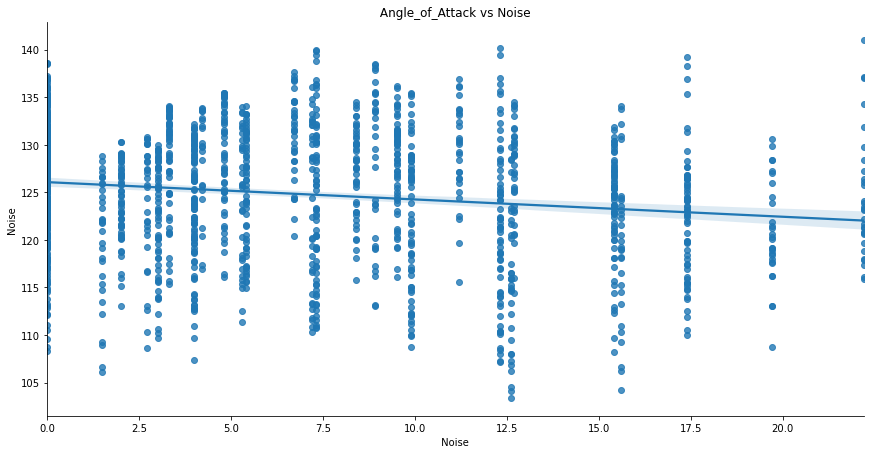

In [13]:
#Line plot
sns.lmplot(x="Angle_of_Attack", y="Noise", data=df,aspect=2,height=6)
plt.xlabel(' Angle_of_Attack ')
plt.xlabel(' Noise ')
plt.title(' Angle_of_Attack vs Noise ')

Text(0.5, 1.0, ' Chord_length vs Noise ')

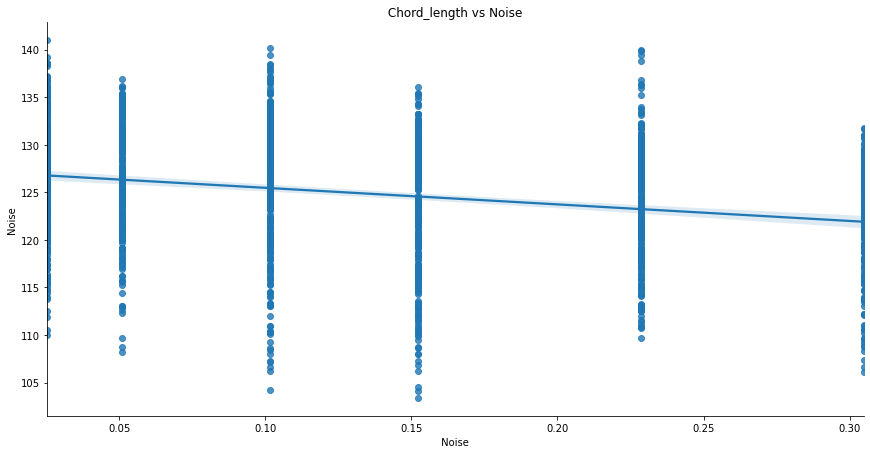

In [14]:
#Line plot
sns.lmplot(x="Chord_length", y="Noise", data=df,aspect=2,height=6)
plt.xlabel(' Chord_length ')
plt.xlabel(' Noise ')
plt.title(' Chord_length vs Noise ')

Text(0.5, 1.0, ' Free_stream_velocity vs Noise ')

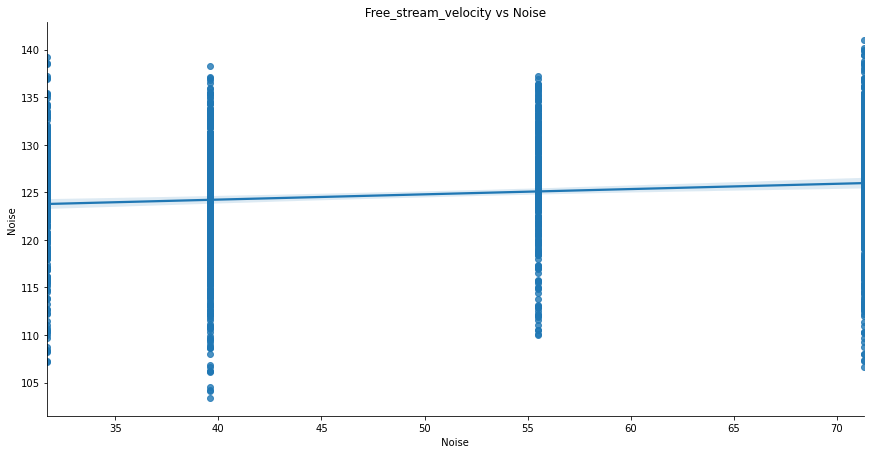

In [15]:
#Line plot
sns.lmplot(x="Free_stream_velocity", y="Noise", data=df,aspect=2,height=6)
plt.xlabel(' Free_stream_velocity ')
plt.xlabel(' Noise ')
plt.title(' Free_stream_velocity vs Noise ')

Text(0.5, 1.0, ' Suction_side_displacement_thickness vs Noise ')

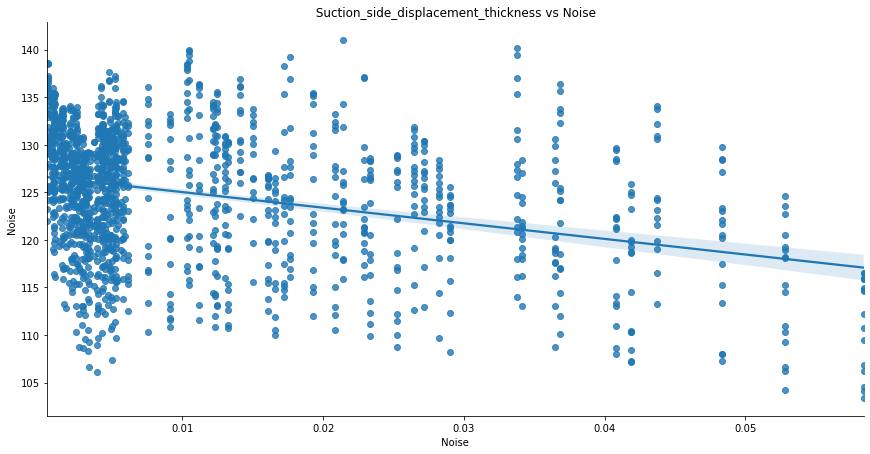

In [16]:
#Line plot
sns.lmplot(x="Suction_side_displacement_thickness", y="Noise", data=df,aspect=2,height=6)
plt.xlabel(' Suction_side_displacement_thickness ')
plt.xlabel(' Noise ')
plt.title(' Suction_side_displacement_thickness vs Noise ')

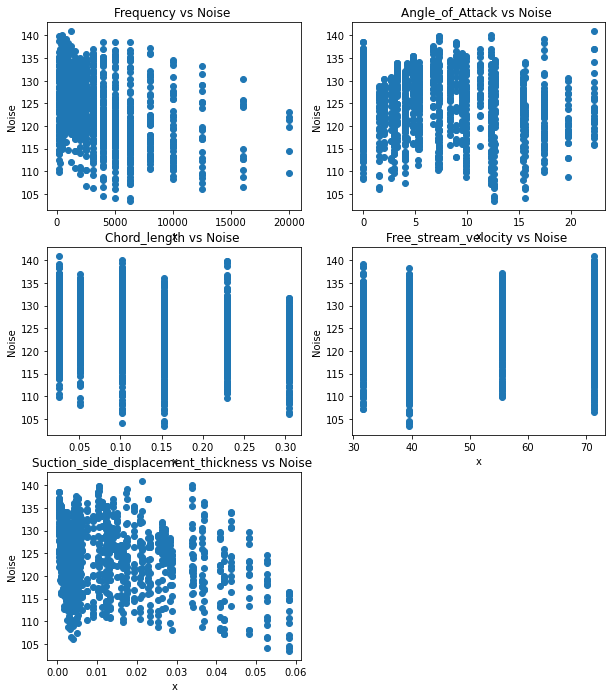

In [18]:
#visualize numerical data
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(df[x],df['Noise'])
    plt.title(x+' vs Noise ')
    plt.ylabel('Noise')
    plt.xlabel('x')

plt.figure(figsize=(10,20))

scatter('Frequency',1)
scatter('Angle_of_Attack', 2)
scatter('Chord_length', 3)
scatter('Free_stream_velocity', 4)
scatter('Suction_side_displacement_thickness',5)

In [19]:
# check if any nulls
df.isnull().values.any()

False

Text(0.5, 1.0, 'Missing value in dataset')

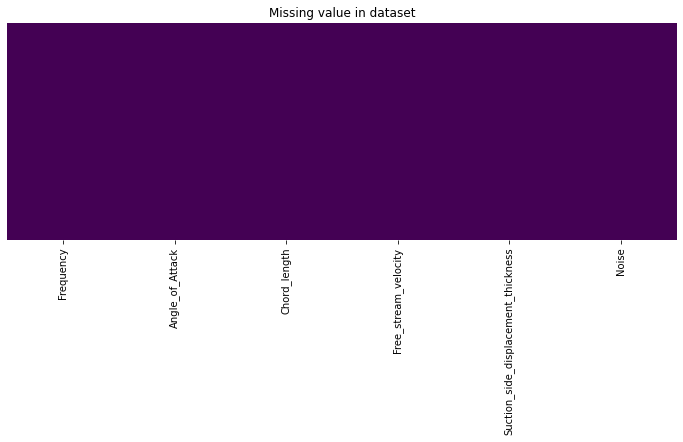

In [20]:
plt.figure(figsize=(12,4))
sns.heatmap(df.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing value in dataset')

<AxesSubplot:>

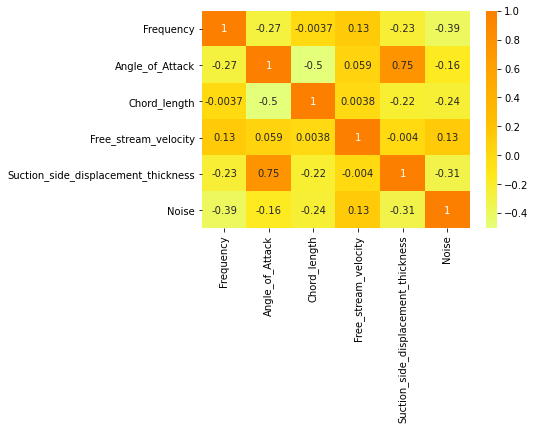

In [21]:
#correlation plot
corr=df.corr()
sns.heatmap(corr,cmap='Wistia',annot=True)

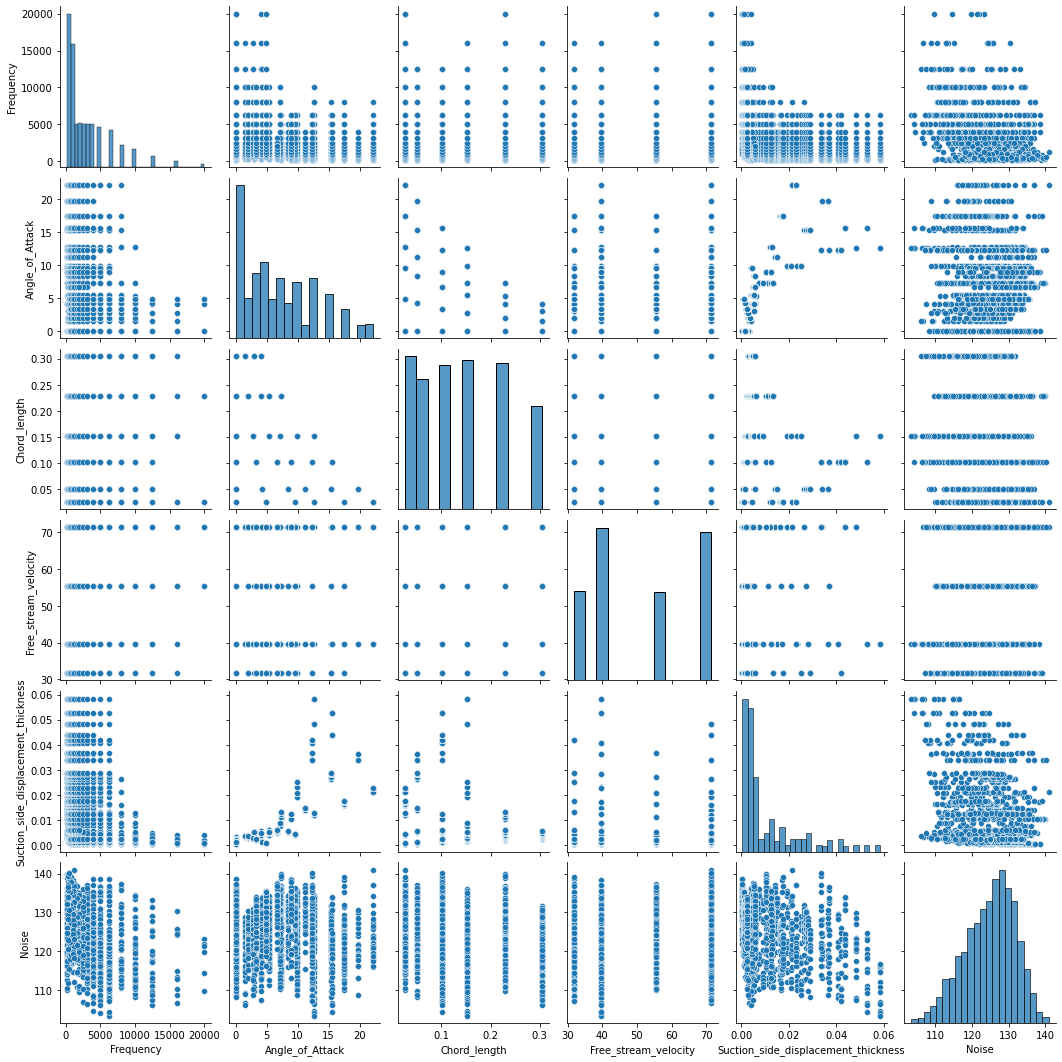

In [22]:
sns.pairplot(df)
plt.show()

In [26]:
X = df.drop('Noise',axis = 1)
y = df['Noise']
X.columns

Index(['Frequency', 'Angle_of_Attack', 'Chord_length', 'Free_stream_velocity',
       'Suction_side_displacement_thickness'],
      dtype='object')

In [25]:
#calculate VIF to detect Multicollinearity
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values,i)
                  for i in range(len(X.columns))]
print(vif_data)

                               feature       VIF
0                            Frequency  1.942627
1                      Angle_of_Attack  6.557489
2                         Chord_length  3.254447
3                 Free_stream_velocity  7.148723
4  Suction_side_displacement_thickness  4.299617


In [27]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=23)

In [28]:
#scale the input variable
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
X_train = std_scaler.fit_transform(X_train)
X_test = std_scaler.transform(X_test)

In [30]:
X_train

array([[-0.67264819, -0.62214925,  1.8189258 , -0.74254503, -0.4581735 ],
       [-0.84632932,  1.51968715, -0.37013176, -0.74254503,  3.25004771],
       [-0.72633145,  1.48568975, -0.91739615,  0.26876484,  1.26348888],
       ...,
       [ 0.06944394,  0.48276636, -1.19102835,  1.27371427, -0.51631334],
       [-0.29370753, -1.13211029, -0.91739615,  0.26876484, -0.78302939],
       [ 1.06416317, -0.21418041,  0.17713263, -1.24501974, -0.43515124]])

In [29]:
#Build model
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [31]:
#Evaluation
y_pred = lin_reg.predict(X_test)
from sklearn.metrics import mean_squared_error
J_mse_sk = mean_squared_error(y_pred,y_test)

R_Square_sk = lin_reg.score(X_test,y_test)
print('Mean squared error :', J_mse_sk)
print('R square error :', R_Square_sk)

Mean squared error : 22.109601388350573
R square error : 0.5286498626950435


In [32]:
VIF = 1/(1-R_Square_sk)
VIF

2.1215650974829674

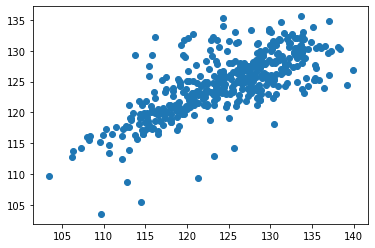

In [33]:
plt.scatter(y_test,y_pred)